# Image Classification
**Note :**
Jadi Aplikasi dapat mendeteksi kelima item berikut
1.   Sampah Organic
2.   Plastik (Recycle)
3.   Kayu (Recycle) --> data kayu dikit banget
4.   Seng / besi (Recycle)
5.   Non-Recycle(Sampah medis, sampah basah, sampah kaca) --> Baru ada gambar berupa obat pil dan botol kaca




In [1]:
# Library yang digunakan
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from keras.models.cloning import Sequential
from PIL import Image

In [2]:
# File path for data
train_dataset = "DATASET/TRAIN"
val_dataset = "DATASET/TEST"

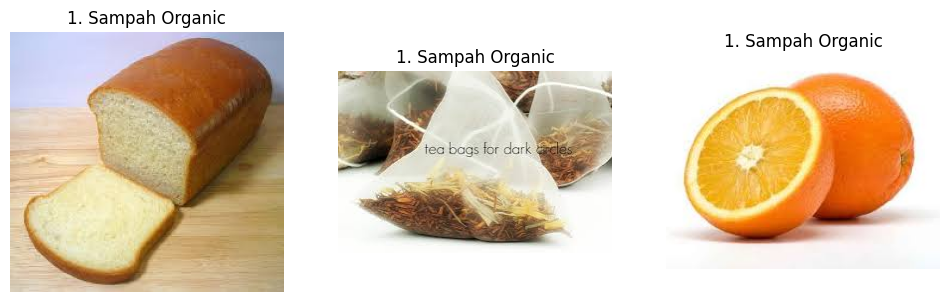

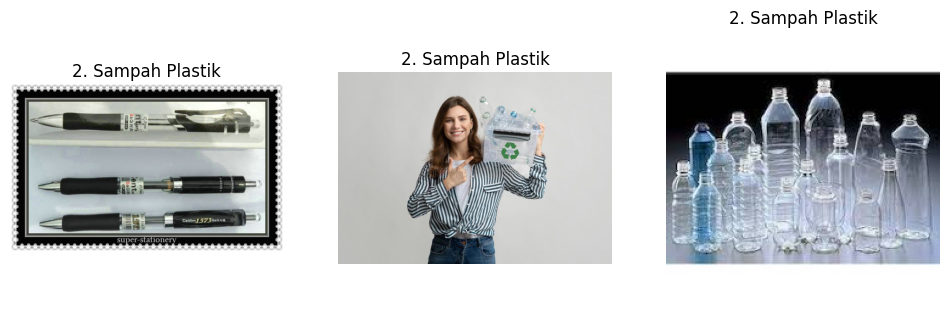

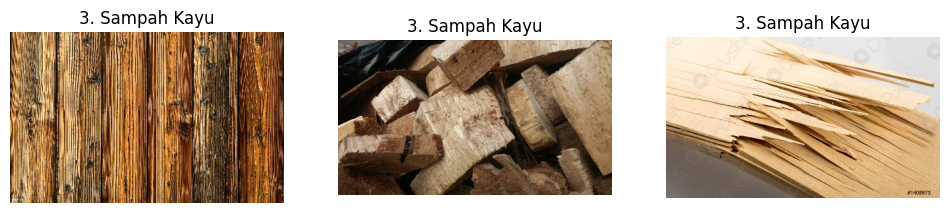

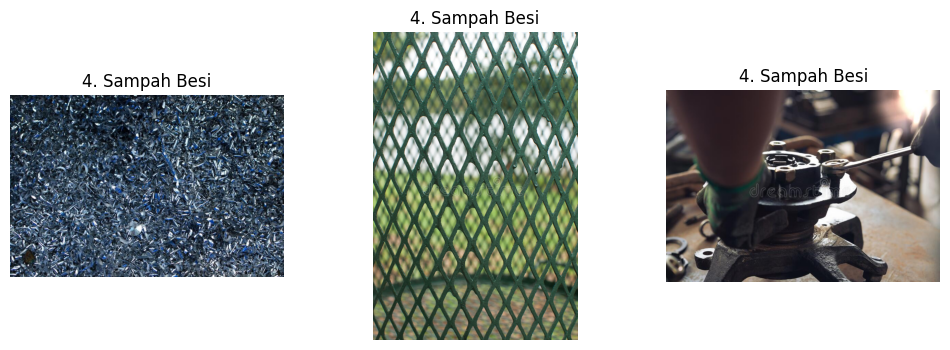

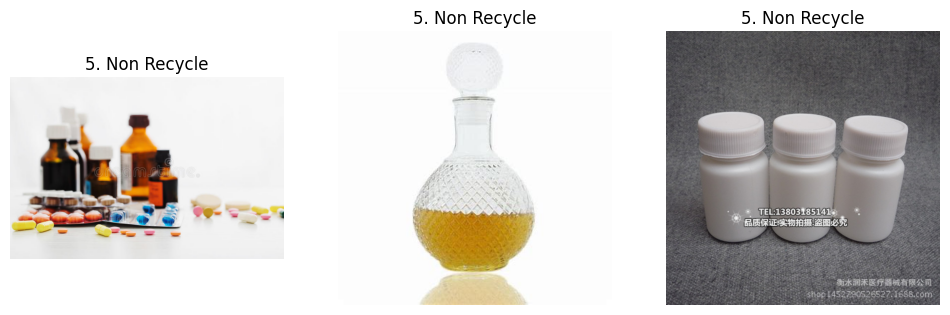

In [3]:
# Show the 3 file for each class in train dataset
def show_images_from_folder(folder_path):
    class_folders = sorted(os.listdir(folder_path))  # Mengurutkan daftar folder kelas
    for class_folder in class_folders:
        class_path = os.path.join(folder_path, class_folder)
        if os.path.isdir(class_path):
            image_files = os.listdir(class_path)
            random.shuffle(image_files)
            sample_files = image_files[:3]  # Ambil 3 gambar acak dari setiap folder
            plt.figure(figsize=(12, 4))
            for idx, file_name in enumerate(sample_files):
                file_path = os.path.join(class_path, file_name)
                img = Image.open(file_path)
                plt.subplot(1, 3, idx+1)
                plt.imshow(img)
                plt.title(class_folder)
                plt.axis('off')
            plt.show()

# Menunjukkan 3 gambar dari setiap folder dalam direktori train_dataset
show_images_from_folder(train_dataset)

In [4]:
# Load the MobileNetV2 model
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers in the base model
base_model.trainable = False

In [5]:
# Image Augmentation 
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                     rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(directory = train_dataset,
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    target_size = (224, 224))

val_datagen = ImageDataGenerator(rescale = 1./255.)
val_generator = val_datagen.flow_from_directory(directory = val_dataset, 
                                                batch_size = 32,
                                                class_mode = 'categorical',
                                                target_size = (224, 224))
  


Found 20906 images belonging to 5 classes.
Found 2789 images belonging to 5 classes.


In [6]:
# Model Architecture
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])


model.compile(optimizer = tf.optimizers.Adam(),
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])




In [10]:
# Train Model
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = val_generator)

Epoch 1/30
654/654 [==============================] - 526s 804ms/step - loss: 0.3028 - accuracy: 0.8902 - val_loss: 0.3925 - val_accuracy: 0.8544
Epoch 2/30
654/654 [==============================] - 633s 968ms/step - loss: 0.2798 - accuracy: 0.8978 - val_loss: 0.4324 - val_accuracy: 0.8548
Epoch 3/30
654/654 [==============================] - 578s 884ms/step - loss: 0.2649 - accuracy: 0.9051 - val_loss: 0.4290 - val_accuracy: 0.8541
Epoch 4/30
654/654 [==============================] - 484s 740ms/step - loss: 0.2558 - accuracy: 0.9074 - val_loss: 0.3839 - val_accuracy: 0.8724
Epoch 5/30
654/654 [==============================] - 494s 755ms/step - loss: 0.2365 - accuracy: 0.9137 - val_loss: 0.4101 - val_accuracy: 0.8523
Epoch 6/30
654/654 [==============================] - 481s 735ms/step - loss: 0.2334 - accuracy: 0.9150 - val_loss: 0.4667 - val_accuracy: 0.8430
Epoch 7/30
654/654 [==============================] - 484s 739ms/step - loss: 0.2219 - accuracy: 0.9191 - val_loss: 0.4326 -

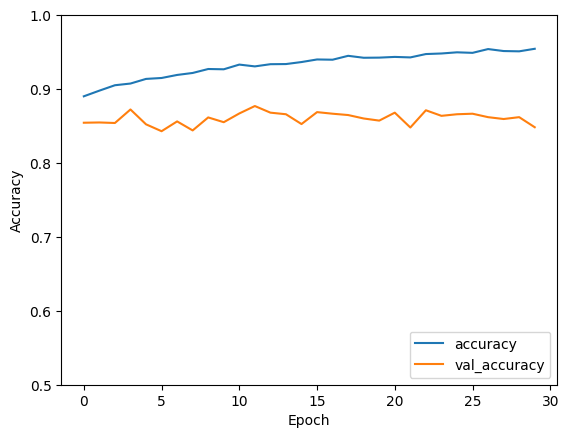

In [11]:
# Show plot train accuracy and val_accuracy
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc = "lower right") 

In [12]:
# Save model h5 
model.save("model.h5")

# Save file training (TensorFlow Lite)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model_classification.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmp5zus6hay\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmp5zus6hay\assets
